In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ggplot import *
import re

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,precision_score

%matplotlib inline

In [2]:
sms = pd.read_csv(r'C:\Users\v-avkama\Documents\MIsc\spam.csv',sep = ',',encoding='Latin-1',names =['class','sms','x2','x3','x4'],error_bad_lines  = False)

In [3]:
sms.head()

,class,sms,x2,x3,x4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
sms.drop(0,inplace=True)

In [5]:
sms.drop(['x2','x3','x4'],axis=1,inplace=True)

In [6]:
sms.head()

,class,sms
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms['length'] = sms['sms'].apply(lambda x: len(x))

In [8]:
sms.head()

,class,sms,length
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61


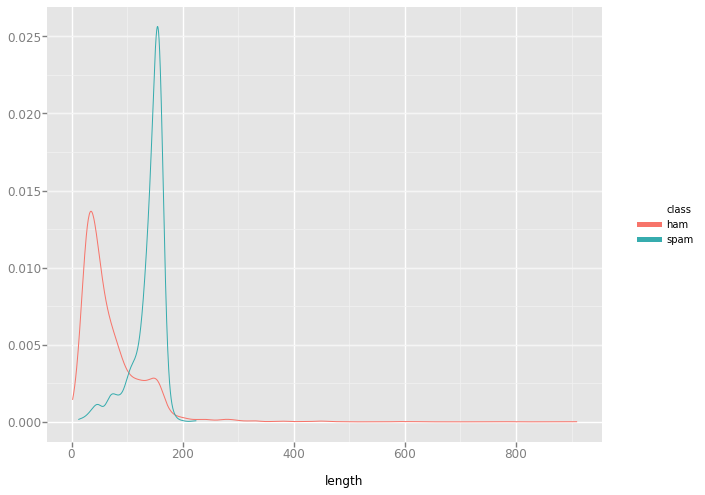

<ggplot: (-9223371917373184831)>

In [9]:
ggplot(aes('length',color = 'class'),sms)+geom_density() #+geom_histogram()

## Cleaning

In [10]:
stemmer = SnowballStemmer('english')
words = stopwords.words('english')

In [11]:
sms['cleansms'] = sms['sms'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split()
                                                 if i.lower not in words]).lower())

In [12]:
sms.head()

,class,sms,length,cleansms
1,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazi avail onli in bugi...
2,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in a wkli comp to win fa cup final ...
4,ham,U dun say so early hor... U c already then say...,49,u dun say so earli hor u c alreadi then say
5,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goe to usf he live around...


In [14]:
sms.drop('sms',axis = 1,inplace = True)

In [15]:
sms.head()

,class,length,cleansms
1,ham,111,go until jurong point crazi avail onli in bugi...
2,ham,29,ok lar joke wif u oni
3,spam,155,free entri in a wkli comp to win fa cup final ...
4,ham,49,u dun say so earli hor u c alreadi then say
5,ham,61,nah i don t think he goe to usf he live around...


In [23]:
pipeline = Pipeline([('vectorize', TfidfVectorizer(stop_words= 'english')),
                   ('selectkbest',SelectKBest(chi2,k = 2000)),
                    ('clf',LinearSVC(C=1.0,penalty='l1',max_iter=3000,dual=False))])
                   

In [32]:
np.random.seed(625)
X_train,X_test,Y_train,Y_test = train_test_split(sms['cleansms'],sms['class'],test_size = 0.3)

In [33]:
model = pipeline.fit(X_train,Y_train)

In [34]:
confusion_matrix(Y_test,pipeline.predict(X_test))

array([[1453,    8],
       [  22,  189]], dtype=int64)

In [58]:
conf_matrix = pd.crosstab(Y_test,pipeline.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
conf_matrix

Predicted,ham,spam
Actual,,
ham,1453,8
spam,22,189


In [57]:
print("Your Model's accuracy is {}".format(
                            sum([conf_matrix[i][i] 
                                 for i in conf_matrix.index])/sum(sum([conf_matrix[i] for i in conf_matrix.index]))
))

print("Your Model's precision is {}".format(
                            conf_matrix['ham']['ham']
                                 /sum(conf_matrix['ham'])
))

print("Your Model's recall is {}".format(
                            conf_matrix['ham']['ham']
                                 /np.sum(conf_matrix[0:1].values)
))

Your Model's accuracy is 0.9820574162679426
Your Model's precision is 0.9850847457627119
Your Model's recall is 0.9945242984257358
